<a href="https://colab.research.google.com/github/ElaYJ/Study_Deep_Learning/blob/main/Lecture/08_Mask_CNN_ReNET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LeNET

- LeNet은 합성곱 신경망(Convolutional Neural Network, CNN)의 초기 형태 중 하나이다.

- LeNet은 여러 개의 합성곱 계층(Convolutional layers)과 풀링 계층(Pooling layers)으로 구성된다.

	이 구조는 입력 이미지의 공간적인 구조를 보존하면서 이미지를 점진적으로 축소하여 추상화하는 역할을 한다.</br>
	마지막에는 완전 연결 계층(Fully Connected layers)을 통해 최종 분류를 수행한다.<br></br>

> Mask를 쓴 사람을 분류(Classification)하는 예제

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!dir

drive  sample_data


### - zipfile

In [ ]:
ls

 Volume in drive D is MY
 Volume Serial Number is F4EA-DF2A

 Directory of d:\Git\ElaYJ_ws\Study_Deep_Learning\Lecture

04-10(수)  AM 08:34    <DIR>          .
04-10(수)  AM 08:34    <DIR>          ..
04-09(화)  AM 05:18         1,166,727 01_Beginning_of_DL.ipynb
04-09(화)  AM 04:17           551,336 02_XOR_Regression.ipynb
04-09(화)  AM 05:19           126,424 03_IRIS_Classification.ipynb
04-09(화)  AM 09:11           295,941 04_MNIST_DNN.ipynb
04-10(수)  AM 07:49           319,562 05_MNIST_CNN.ipynb
04-10(수)  AM 07:54    <DIR>          05_MNIST_CNN_model.h5py
04-10(수)  AM 06:02           589,175 06_DL_from_scratch.ipynb
04-10(수)  AM 07:54                 0 07_Mask_LeNET_CNN.ipynb
04-10(수)  AM 07:57    <DIR>          data
               7 File(s)      3,049,165 bytes
               4 Dir(s)  97,865,793,536 bytes free


In [ ]:
!dir /b

01_Beginning_of_DL.ipynb
02_XOR_Regression.ipynb
03_IRIS_Classification.ipynb
04_MNIST_DNN.ipynb
05_MNIST_CNN.ipynb
05_MNIST_CNN_model.h5py
06_DL_from_scratch.ipynb
07_Mask_LeNET_CNN.ipynb
data


In [ ]:
ls "./data/"

 Volume in drive D is MY
 Volume Serial Number is F4EA-DF2A

 Directory of d:\Git\ElaYJ_ws\Study_Deep_Learning\Lecture\data

04-10(수)  AM 07:57    <DIR>          .
04-10(수)  AM 07:57    <DIR>          ..
04-10(수)  AM 07:52       346,345,728 archive.zip
               1 File(s)    346,345,728 bytes
               2 Dir(s)  97,865,793,536 bytes free


In [ ]:
!dir "./data/" /b

archive.zip


In [ ]:
import zipfile

content_zip = zipfile.ZipFile("./data/archive.zip")
content_zip.extractall("./data/")
content_zip.close()

In [ ]:
!dir "./data/" /b

archive.zip
Face Mask Dataset


In [ ]:
!dir "./data/Face Mask Dataset/" /b

Test
Train
Validation


In [ ]:
!dir "./data/Face Mask Dataset/Train" /b

WithMask
WithoutMask


In [ ]:
# !dir "./data/Face Mask Dataset/Train/WithMask" /b

In [4]:
!dir "/content/drive/MyDrive/zero-base DS/DL/_data"

archive.zip  dataset.zip  ethics.tar  ratings_test.txt	ratings_train.txt


In [6]:
!unzip "/content/drive/MyDrive/zero-base DS/DL/_data/archive.zip" # -d "/content/drive/MyDrive/zero-base DS/DL/_data/"

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: Face Mask Dataset/Train/WithoutMask/1855.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1856.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1857.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1858.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1859.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1860.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1861.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1862.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1863.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1864.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1865.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1866.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1867.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1868.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1869.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1870.png  
  in

### - import

In [7]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
import tensorflow as tf
# from tensorflow.keras import Sequential, models
# from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

### - image file

In [9]:
# path = "./data/Face Mask Dataset/"
path = "/content/Face Mask Dataset/"
dataset = {"image_path": [], "mask_status": [], "where": []}

for where in os.listdir(path):
    print("Where -->", where)
    for status in os.listdir(path + "/" + where):
        print("\tStatus -->", status)
        for image in glob.glob(path + where + "/" + status + "/" + "*.png"):
            dataset['image_path'].append(image)
            dataset['mask_status'].append(status)
            dataset['where'].append(where)

Where --> Test
	Status --> WithoutMask
	Status --> WithMask
Where --> Validation
	Status --> WithoutMask
	Status --> WithMask
Where --> Train
	Status --> WithoutMask
	Status --> WithMask


In [10]:
# 이미지의 경로와 목록 정리
dataset = pd.DataFrame(dataset)
dataset.head()

,image_path,mask_status,where
0,/content/Face Mask Dataset/Test/WithoutMask/14...,WithoutMask,Test
1,/content/Face Mask Dataset/Test/WithoutMask/40...,WithoutMask,Test
2,/content/Face Mask Dataset/Test/WithoutMask/23...,WithoutMask,Test
3,/content/Face Mask Dataset/Test/WithoutMask/35...,WithoutMask,Test
4,/content/Face Mask Dataset/Test/WithoutMask/58...,WithoutMask,Test


With Mask: 5909
Without Mask: 5883


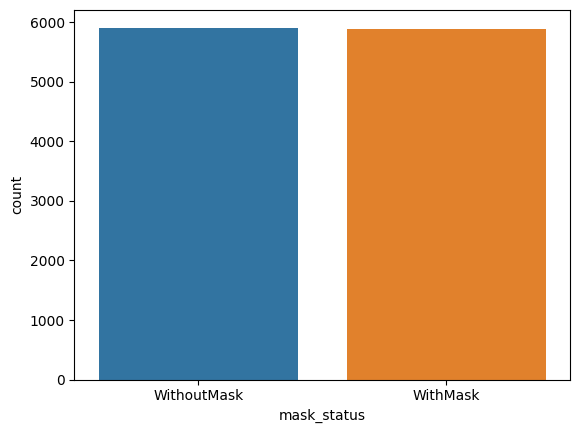

In [11]:
print("With Mask:", dataset.value_counts("mask_status")[0])
print("Without Mask:", dataset.value_counts("mask_status")[1])

sns.countplot(x=dataset['mask_status'], hue=dataset['mask_status'], legend=False);

### - image 확인

In [ ]:
# !pip install opencv-python

   ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
   ---------------------------------------- 0.1/38.6 MB 1.2 MB/s eta 0:00:34
    --------------------------------------- 0.5/38.6 MB 4.5 MB/s eta 0:00:09
   - -------------------------------------- 1.1/38.6 MB 7.0 MB/s eta 0:00:06
   - -------------------------------------- 1.8/38.6 MB 8.9 MB/s eta 0:00:05
   -- ------------------------------------- 2.5/38.6 MB 9.5 MB/s eta 0:00:04
   --- ------------------------------------ 3.1/38.6 MB 9.8 MB/s eta 0:00:04
   --- ------------------------------------ 3.6/38.6 MB 9.9 MB/s eta 0:00:04
   ---- ----------------------------------- 4.1/38.6 MB 10.1 MB/s eta 0:00:04
   ---- ----------------------------------- 4.6/38.6 MB 10.2 MB/s eta 0:00:04
   ----- ---------------------------------- 5.2/38.6 MB 10.4 MB/s eta 0:00:04
   ----- ---------------------------------- 5.7/38.6 MB 10.7 MB/s eta 0:00:04
   ------

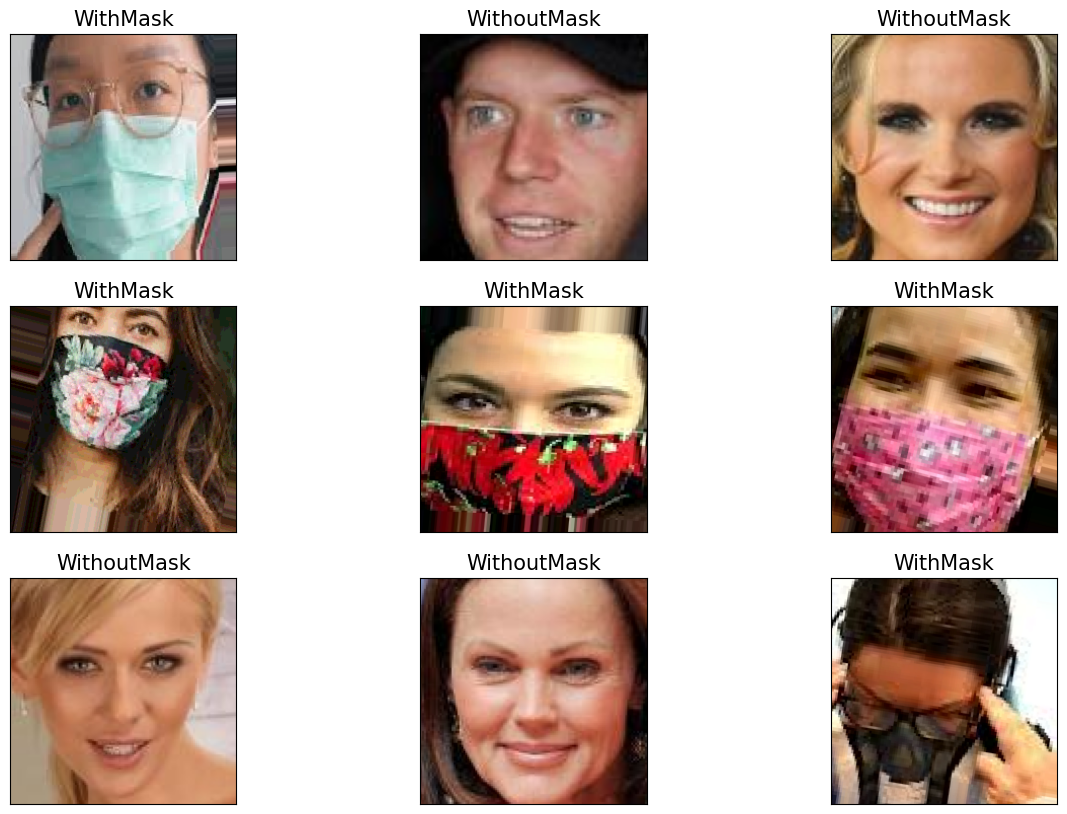

In [12]:
import cv2

# 랜덤하게 어떤 이미지들이 있는지 확인해 본다.
plt.figure(figsize=(15,10))

for i in range(9):
    random = np.random.randint(1, len(dataset))
    img = cv2.imread(dataset.loc[random, 'image_path'])
    plt.subplot(3, 3, i+1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(dataset.loc[random, 'mask_status'], size=15)
    plt.xticks([])
    plt.yticks([])
plt.show()

In [13]:
train_df = dataset.query("where=='Train'")
test_df = dataset.query("where=='Test'")
valid_df = dataset.query("where=='Validation'")

train_df.head()

,image_path,mask_status,where
1792,/content/Face Mask Dataset/Train/WithoutMask/4...,WithoutMask,Train
1793,/content/Face Mask Dataset/Train/WithoutMask/2...,WithoutMask,Train
1794,/content/Face Mask Dataset/Train/WithoutMask/5...,WithoutMask,Train
1795,/content/Face Mask Dataset/Train/WithoutMask/3...,WithoutMask,Train
1796,/content/Face Mask Dataset/Train/WithoutMask/1...,WithoutMask,Train


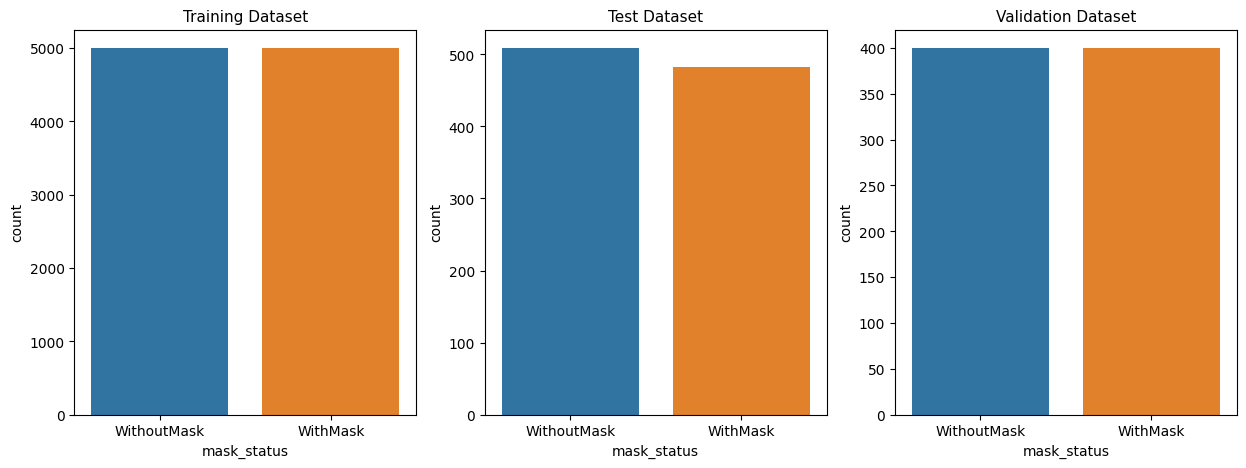

In [14]:
# Train / Test / Validation 데이터의 분포 확인

plt.figure(figsize=(15,5))

plt.subplot(1, 3, 1)
sns.countplot(x=train_df['mask_status'], hue=train_df['mask_status'], legend=False)
plt.title("Training Dataset", size=11)

plt.subplot(1, 3, 2)
sns.countplot(x=test_df['mask_status'], hue=test_df['mask_status'], legend=False)
plt.title("Test Dataset", size=11)

plt.subplot(1, 3, 3)
sns.countplot(x=valid_df['mask_status'], hue=valid_df['mask_status'], legend=False)
plt.title("Validation Dataset", size=11)

plt.show()

In [15]:
# Index 정리

train_df.reset_index(drop=True, inplace=True)
train_df.head()

,image_path,mask_status,where
0,/content/Face Mask Dataset/Train/WithoutMask/4...,WithoutMask,Train
1,/content/Face Mask Dataset/Train/WithoutMask/2...,WithoutMask,Train
2,/content/Face Mask Dataset/Train/WithoutMask/5...,WithoutMask,Train
3,/content/Face Mask Dataset/Train/WithoutMask/3...,WithoutMask,Train
4,/content/Face Mask Dataset/Train/WithoutMask/1...,WithoutMask,Train


### - 데이터 전처리

In [16]:
# 데이터 전처리

data = []
image_size = 150

for i in range(len(train_df)):
    # Converting the image into grayscale
    # 이미지를 가지고 올 때 회식으로 변환
    img_arr = cv2.imread(train_df['image_path'][i], cv2.IMREAD_GRAYSCALE)

    # Resizing the array
    # 이미지의 크기를 동일하게 재조정
    new_img_arr = cv2.resize(img_arr, (image_size, image_size))

    # Encoding the image with the label
    if train_df['mask_status'][i] == "WithMask":
        data.append([new_img_arr, 1])
    else:
        data.append([new_img_arr, 0])

len(data), data[0]

(10000,
 [array([[197, 201, 205, ..., 152, 144, 132],
         [202, 202, 200, ..., 149, 143, 140],
         [206, 202, 195, ..., 144, 141, 147],
         ...,
         [131, 106,  90, ..., 222, 225, 227],
         [111, 101,  94, ..., 222, 225, 226],
         [ 81,  94, 108, ..., 223, 224, 225]], dtype=uint8),
  0])

In [19]:
np.random.shuffle(data)
data[0], data[0][0].shape

([array([[ 77,  76,  76, ...,  83,  91,  98],
         [ 76,  75,  75, ...,  79,  85,  92],
         [ 75,  74,  75, ...,  75,  80,  85],
         ...,
         [ 50,  51,  52, ...,  95, 100, 105],
         [ 47,  47,  48, ...,  92,  98, 103],
         [ 45,  44,  45, ...,  89,  95, 101]], dtype=uint8),
  0],
 (150, 150))

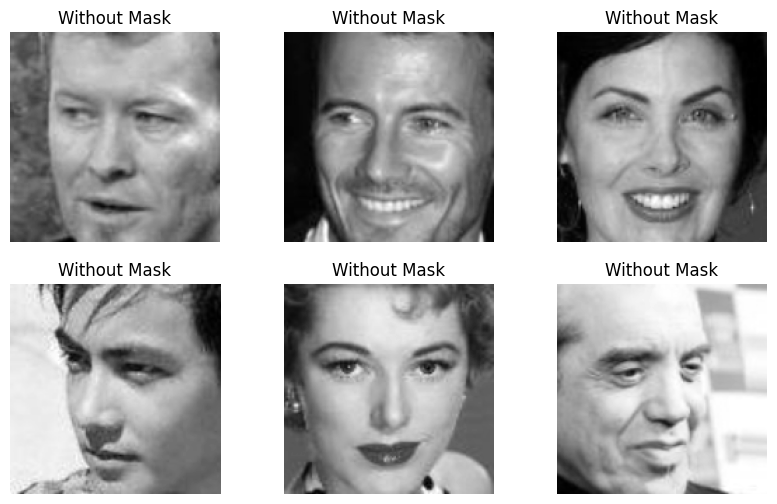

In [20]:
fig, ax = plt.subplots(2,3, figsize=(10,6))

for row in range(2):
    for col in range(3):
        image_idx = row * 100 + col

        ax[row, col].axis("off")
        ax[row, col].imshow(data[image_idx][0], cmap='gray')

        if data[image_idx][1] == 0:
            ax[row, col].set_title("Without Mask")
        else:
            ax[row, col].set_title("With Mask")


In [21]:
# X, y Data로 저장

X = []
y = []

for img in data:
    X.append(img[0])
    y.append(img[1])

X = np.array(X)
y = np.array(y)

In [22]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=27)

### - 모델 생성

In [23]:
from tensorflow.keras import layers, models

model = models.Sequential([
	layers.Conv2D(32, kernel_size=(5,5), strides=(1,1), padding='same', activation='relu', input_shape=(150,150,1)),
	layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
	layers.Conv2D(64, kernel_size=(2,2), padding='same', activation='relu'),
	layers.MaxPooling2D(pool_size=(2,2)),
	layers.Dropout(0.25),
	layers.Flatten(),
	layers.Dense(1000, activation='relu'),
	layers.Dense(1, activation='sigmoid'),
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      832       
                                                                 
 max_pooling2d (MaxPooling2  (None, 75, 75, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        8256      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 37, 37, 64)        0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 37, 37, 64)        0         
                                                                 
 flatten (Flatten)           (None, 87616)             0

In [24]:
model.compile(optimizer='adam', loss=tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [25]:
X_train.shape, len(X_train)

((8000, 150, 150), 8000)

In [26]:
X_valid.shape, len(X_valid)

((2000, 150, 150), 2000)

### - 모델 학습

In [27]:
%%time

# X_train = X_train.reshape(len(X_train), X_train.shape[1], X_train.shape[2], 1)
# X_valid = X_valid.reshape(len(X_valid), X_valid.shape[1], X_valid.shape[2], 1)
X_train = X_train.reshape(-1, 150, 150, 1)
X_valid = X_valid.reshape(-1, 150, 150, 1)

hist = model.fit(X_train, y_train, epochs=4, batch_size=32) #--> 한번에 32장씩 가져와서 학습

Epoch 1/4
250/250 [==============================] - 17s 46ms/step - loss: 19.2496 - accuracy: 0.9099
Epoch 2/4
250/250 [==============================] - 11s 46ms/step - loss: 0.0608 - accuracy: 0.9796
Epoch 3/4
250/250 [==============================] - 11s 46ms/step - loss: 0.0222 - accuracy: 0.9923
Epoch 4/4
250/250 [==============================] - 11s 46ms/step - loss: 0.0166 - accuracy: 0.9934
CPU times: user 48.3 s, sys: 936 ms, total: 49.3 s
Wall time: 52.2 s


### - 학습 결과

In [28]:
model.evaluate(X_valid, y_valid) #--> evaluation연산은 순방향 연산이라 빨리 걸린다.

63/63 [==============================] - 1s 9ms/step - loss: 0.1112 - accuracy: 0.9710


[0.11117405444383621, 0.9710000157356262]

In [29]:
prediction = (model.predict(X_valid) > 0.5).astype("int32")

print(classification_report(y_valid, prediction))
print(confusion_matrix(y_valid, prediction))

63/63 [==============================] - 0s 6ms/step
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       982
           1       0.96      0.99      0.97      1018

    accuracy                           0.97      2000
   macro avg       0.97      0.97      0.97      2000
weighted avg       0.97      0.97      0.97      2000

[[ 939   43]
 [  15 1003]]


In [30]:
# 틀린 것만 추려서 확인

wrong_result = []

for n in range(len(y_valid)):
    if prediction[n] != y_valid[n]:
        wrong_result.append(n)

len(wrong_result)

58

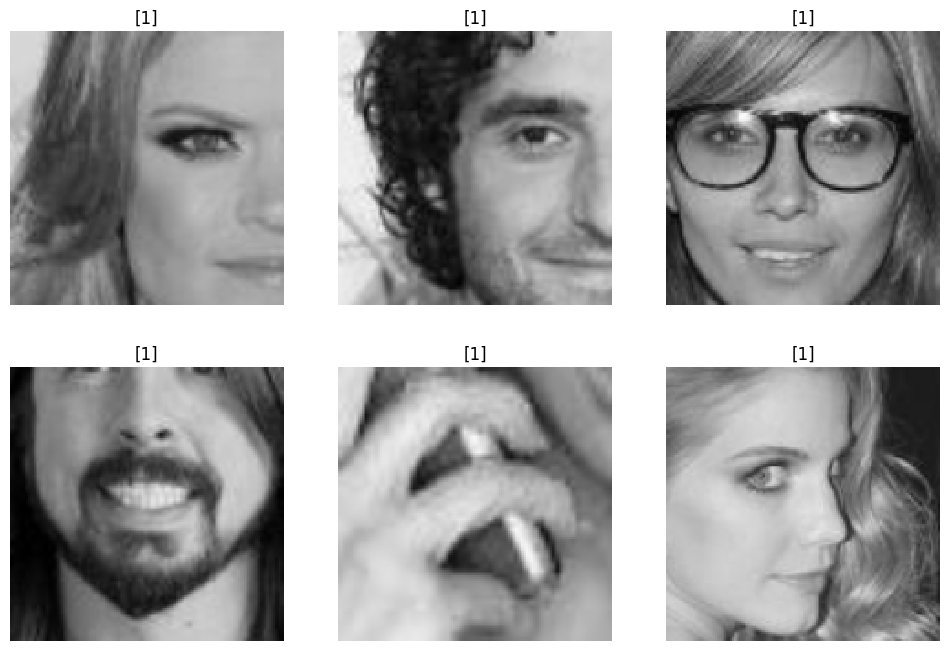

In [36]:
import random
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

samples = random.choices(population=wrong_result, k=6)

plt.figure(figsize=(12,8))
for i, n in enumerate(samples):
    plt.subplot(2, 3, i+1)
    plt.imshow(cv2.cvtColor(X_valid[n].reshape(150,150), cv2.COLOR_BGR2RGB), interpolation='nearest')
    plt.title(prediction[n])
    plt.axis("off")

plt.show()